In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_data=pd.read_csv("../input/titanic/train.csv")
test_data=pd.read_csv("../input/titanic/test.csv")

FileNotFoundError: [Errno 2] File ../input/titanic/train.csv does not exist: '../input/titanic/train.csv'

In [ ]:
train_data.head()

In [ ]:
train_data.loc[train_data.Cabin=="G6"]

In [ ]:
train_data.Embarked.value_counts()

In [6]:
train_data.Embarked.mode()

0    S
dtype: object

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_data.update(train_data["Age"].fillna(value=train_data["Age"].mean()))
train_data.update(train_data["Cabin"].fillna(method='bfill', axis=0).fillna("C78"))
train_data.update(train_data["Embarked"].fillna("S"))

In [9]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train_data.Cabin.value_counts()

C78            34
D33            25
B96 B98        24
C23 C25 C27    21
E33            20
               ..
C106            1
B37             1
C103            1
C87             1
C99             1
Name: Cabin, Length: 147, dtype: int64

In [12]:
kabin=train_data.groupby(['Cabin']).Cabin.agg([len])

In [13]:
jumlah_1=list(kabin.loc[kabin.len==1].index)
len(jumlah_1)

20

In [14]:
len_cabin=kabin.groupby(['len']).len.agg([len]).index

In [15]:
kamus_kabin={}
i=1
for lens in len_cabin:
    kamus_kabin[i]=list(kabin.loc[kabin.len==lens].index)
    i +=1
kamus_kabin.items()

dict_items([(1, ['B37', 'B4', 'B80', 'B94', 'C103', 'C106', 'C45', 'C46', 'C54', 'C62 C64', 'C87', 'C91', 'C99', 'D10 D12', 'D21', 'D6', 'E34', 'E40', 'E50', 'F G63']), (2, ['A10', 'A14', 'A26', 'A32', 'A6', 'B30', 'B41', 'B50', 'B57 B59 B63 B66', 'B71', 'B86', 'C148', 'C52', 'C85', 'D11', 'D49', 'D7', 'D9', 'E36', 'E63', 'E68', 'T']), (3, ['A23', 'B20', 'B3', 'B39', 'C111', 'C123', 'C124', 'C49', 'C65', 'C90', 'D15', 'D19', 'D30', 'D45', 'D46', 'E12', 'E38', 'E46', 'E58']), (4, ['A31', 'A36', 'A5', 'A7', 'B19', 'B22', 'B73', 'B78', 'C104', 'C118', 'C47', 'C86', 'C95', 'D28', 'D50', 'E17', 'E31', 'F E69', 'F38']), (5, ['A24', 'B18', 'B69', 'C30']), (6, ['A16', 'B102', 'B79', 'C128', 'C32', 'C70', 'D26', 'E121', 'E49']), (7, ['A34', 'B101', 'B82 B84', 'C2', 'C50', 'C7', 'C82', 'C83', 'D35', 'E24', 'E67', 'E77']), (8, ['A20', 'B42', 'C110', 'C126', 'C93', 'D20', 'D47', 'E25']), (9, ['A19', 'B38', 'B51 B53 B55', 'B58 B60', 'C22 C26', 'D36', 'E44', 'F33']), (10, ['D37', 'D56', 'E101', 'E8'

In [16]:
list(kamus_kabin.keys())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [17]:
train_data['Cabin2'] = train_data['Cabin']

In [18]:
for i in list(kamus_kabin.keys()):
    train_data['Cabin'] = train_data['Cabin'].replace(kamus_kabin[i],i)

In [19]:
print(jumlah_1)

['B37', 'B4', 'B80', 'B94', 'C103', 'C106', 'C45', 'C46', 'C54', 'C62 C64', 'C87', 'C91', 'C99', 'D10 D12', 'D21', 'D6', 'E34', 'E40', 'E50', 'F G63']


In [20]:
jumlah_1=list(kabin.loc[kabin.len==1].index)

In [21]:
for i in range(1,5):
    train_data['Cabin2'] = train_data['Cabin2'].replace(kamus_kabin[i],i)

In [22]:
k=5
for i in range(5,24):
    for item in kamus_kabin[i]:
        train_data['Cabin2'] = train_data['Cabin2'].replace(item,k)
        k+=1

In [23]:
train_data.groupby(['Cabin2']).Cabin2.agg([len])

,len
Cabin2,
1,20
2,44
3,57
4,76
5,5
...,...
67,20
68,21
69,24


In [24]:
train_data.groupby(['Cabin']).Cabin.agg([len])

,len
Cabin,
1,20
2,44
3,57
4,76
5,20
6,54
7,84
8,64
9,72


In [25]:
kabin.groupby(['len']).len.agg([len])

,len
len,
1,20
2,22
3,19
4,19
5,4
6,9
7,12
8,8
9,8


In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3,S,3


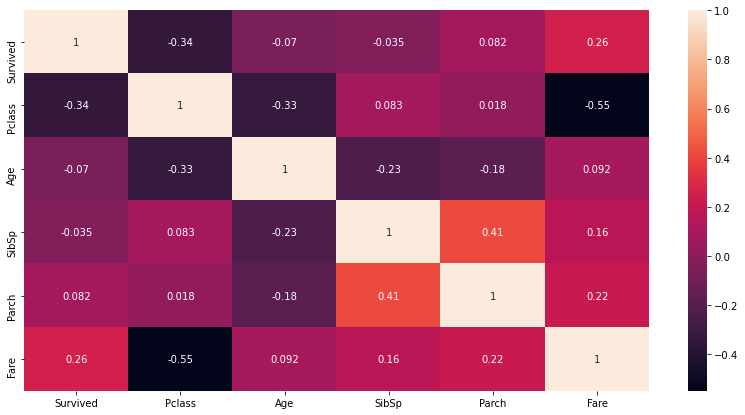

In [27]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data[["Survived","Pclass","Age","SibSp","Parch","Fare","Sex"]].corr(),annot=True)
plt.show()

In [28]:
train_data["Title"]=train_data.Name.str.extract('([A-Za-z]+)\.',expand=False)
train_data["Title2"]=train_data.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin2,Title,Title2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,S,2,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C,2,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3,S,3,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S,3,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3,S,3,Mr,Mr


In [30]:
grouping=train_data.groupby(["Title"]).Title.agg([len])

In [31]:
Rare=list(grouping.loc[grouping.len<=7].index)

In [32]:
train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Don           1
Countess      1
Sir           1
Capt          1
Mme           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [33]:
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace(Rare,'Rare')

In [34]:
train_data['Title2'] = train_data['Title2'].replace('Mlle', 'Miss')
train_data['Title2'] = train_data['Title2'].replace('Ms', 'Miss')
train_data['Title2'] = train_data['Title2'].replace('Mme', 'Mrs')
train_data['Title2'] = train_data['Title2'].replace(Rare,'Rare')

In [35]:
mapping_title={}
i=1
for item in list(train_data.Title.unique()):
    mapping_title[item]=i
    i+=1
mapping_title.items()

dict_items([('Mr', 1), ('Mrs', 2), ('Miss', 3), ('Master', 4), ('Rare', 5)])

In [36]:
train_data['Title'] = train_data['Title'].map(mapping_title)

In [37]:
train_data.groupby(["Title"]).Survived.mean()

Title
1    0.156673
2    0.793651
3    0.702703
4    0.575000
5    0.347826
Name: Survived, dtype: float64

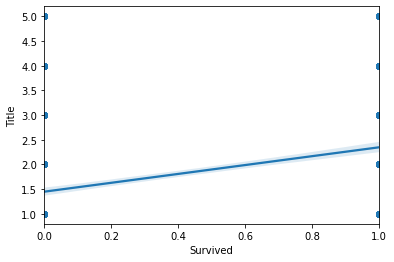

In [38]:
sns.regplot(x=train_data['Survived'], y=train_data['Title'])

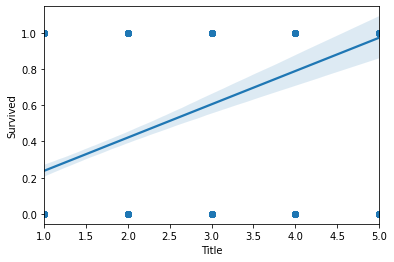

In [39]:
sns.regplot(x=train_data['Title'], y=train_data['Survived'])

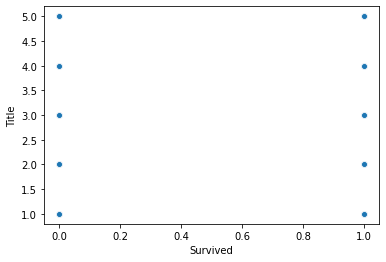

In [40]:
sns.scatterplot(x=train_data['Survived'], y=train_data['Title'])

In [41]:
train_data[['Survived','Title']].corr()

,Survived,Title
Survived,1.000000,0.405921
Title,0.405921,1.000000


In [42]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_data['Title2'] = train_data['Title2'].map(title_mapping)

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin2,Title,Title2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,S,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,C,2,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,3,S,3,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S,3,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,3,S,3,1,1


In [78]:
train_data[['Survived','Title','Title2','Cabin','Cabin2','Sex','Age','SibSp','Parch','Pclass','Embarked','PassengerId','Fare']].corr()

,Survived,Title,Title2,Cabin,Cabin2,Sex,Age,SibSp,Parch,Pclass,Embarked,PassengerId,Fare
Survived,1.000000,0.405921,0.407753,-0.062510,-0.069010,0.543351,-0.069809,-0.035322,0.081629,-0.338481,0.106811,-0.005007,0.257307
Title,0.405921,1.000000,0.845387,0.015944,-0.004233,0.564438,-0.240467,0.269474,0.267818,-0.120491,0.120082,-0.025145,0.140745
Title2,0.407753,0.845387,1.000000,0.017518,0.006762,0.502713,-0.097454,0.269623,0.315784,-0.173929,0.045400,0.003878,0.136310
Cabin,-0.062510,0.015944,0.017518,1.000000,0.945567,0.033499,-0.139407,0.094791,0.090708,0.224136,-0.023639,-0.230628,-0.087911
Cabin2,-0.069010,-0.004233,0.006762,0.945567,1.000000,0.032547,-0.130594,0.087322,0.085751,0.227655,-0.028137,-0.191762,-0.091522
Sex,0.543351,0.564438,0.502713,0.033499,0.032547,1.000000,-0.084153,0.114631,0.245489,-0.131900,0.116569,-0.042939,0.182333
Age,-0.069809,-0.240467,-0.097454,-0.139407,-0.130594,-0.084153,1.000000,-0.232625,-0.179191,-0.331339,0.007461,0.033207,0.091566
SibSp,-0.035322,0.269474,0.269623,0.094791,0.087322,0.114631,-0.232625,1.000000,0.414838,0.083081,-0.059961,-0.057527,0.159651
Parch,0.081629,0.267818,0.315784,0.090708,0.085751,0.245489,-0.179191,0.414838,1.000000,0.018443,-0.078665,-0.001652,0.216225
Pclass,-0.338481,-0.120491,-0.173929,0.224136,0.227655,-0.131900,-0.331339,0.083081,0.018443,1.000000,0.045702,-0.035144,-0.549500


In [45]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int64
Embarked        object
Cabin2           int64
Title            int64
Title2           int64
dtype: object

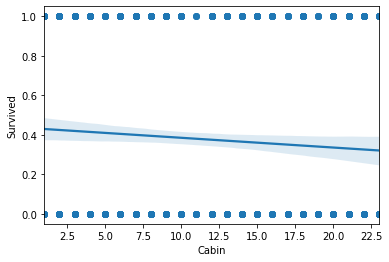

In [46]:
sns.regplot(x=train_data['Cabin'], y=train_data['Survived'])

In [47]:
train_data['Sex'] = train_data['Sex'].map({'male':1,'female':2})

In [48]:
train_data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin2,Title,Title2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,2,2,2,2,3
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,3,1,3,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,3,1,3,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,3,1,3,1,1


In [49]:
train_data['Embarked'] = train_data['Embarked'].map({'S':1,'C':2,'Q':3})

In [77]:
fitur=["Pclass","Sex","Age","SibSp","Fare","Cabin2","Embarked","Title2"]

In [53]:
from sklearn.model_selection import train_test_split
X=train_data[fitur]
y=train_data.Survived
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [70]:
def training_data(fitur,jumlah_node):
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    X=train_data[fitur]
    y=train_data.Survived
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
    
    #DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    dtree_c = DecisionTreeClassifier(random_state = 1)
    dtree_c.fit(train_X, train_y)
    acc_DT_c = metrics.accuracy_score(dtree_c.predict(val_X), val_y)

    #DecisionTreeRegressor
    from sklearn.tree import DecisionTreeRegressor
    dtree_r = DecisionTreeClassifier(max_leaf_nodes=jumlah_node,random_state = 1)
    dtree_r.fit(train_X, train_y)
    acc_DT_r = metrics.accuracy_score(dtree_r.predict(val_X), val_y)

    #RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    rforest_c = RandomForestClassifier(random_state = 1)
    rforest_c.fit(train_X, train_y)
    acc_RF_c = metrics.accuracy_score(rforest_c.predict(val_X), val_y)

    #LogisticRegression
    from sklearn.linear_model import LogisticRegression
    modelLR = LogisticRegression(random_state = 1)
    modelLR.fit(train_X, train_y)
    acc_LR = metrics.accuracy_score(modelLR.predict(val_X), val_y)

    #ModelSVC
    from sklearn.svm import SVC
    modelSVC = SVC(random_state = 1)
    modelSVC.fit(train_X, train_y)
    acc_SVC = metrics.accuracy_score(modelSVC.predict(val_X), val_y)

    #XGBClassifier
    from xgboost import XGBClassifier
    modelXGB = XGBClassifier(random_state = 1)
    modelXGB.fit(train_X, train_y)
    acc_XGB = metrics.accuracy_score(modelXGB.predict(val_X), val_y)

    return [acc_DT_c*100,acc_DT_r*100,acc_RF_c*100,acc_LR*100,acc_SVC*100,acc_XGB*100]

In [75]:
def tulis(fitur,node):
    array=training_data(fitur,node)
    print("Akurasi Desicion Tree Classifier : ",array[0])
    print("Akurasi Desicion Tree Regressor : ",array[1])
    print("Akurasi Random Forest Classifier : ",array[2])
    print("Akurasi Logistic Regression : ",array[3])
    print("Akurasi Pemodelan SVC : ",array[4])
    print("Akurasi XGBClassifier : ",array[5])

In [81]:
fitur1=["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin2","Embarked","Title2"]
node1=60
tulis(fitur1,node1)

Akurasi Desicion Tree Classifier :  77.13004484304933
Akurasi Desicion Tree Regressor :  82.51121076233184
Akurasi Random Forest Classifier :  80.26905829596413
Akurasi Logistic Regression :  81.61434977578476
Akurasi Pemodelan SVC :  62.78026905829597
Akurasi XGBClassifier :  78.9237668161435


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [79]:
train_data[['Survived','Title','Title2','Cabin','Cabin2','Sex','Age','SibSp','Parch','Pclass','Embarked','PassengerId','Fare']].corr()

,Survived,Title,Title2,Cabin,Cabin2,Sex,Age,SibSp,Parch,Pclass,Embarked,PassengerId,Fare
Survived,1.000000,0.405921,0.407753,-0.062510,-0.069010,0.543351,-0.069809,-0.035322,0.081629,-0.338481,0.106811,-0.005007,0.257307
Title,0.405921,1.000000,0.845387,0.015944,-0.004233,0.564438,-0.240467,0.269474,0.267818,-0.120491,0.120082,-0.025145,0.140745
Title2,0.407753,0.845387,1.000000,0.017518,0.006762,0.502713,-0.097454,0.269623,0.315784,-0.173929,0.045400,0.003878,0.136310
Cabin,-0.062510,0.015944,0.017518,1.000000,0.945567,0.033499,-0.139407,0.094791,0.090708,0.224136,-0.023639,-0.230628,-0.087911
Cabin2,-0.069010,-0.004233,0.006762,0.945567,1.000000,0.032547,-0.130594,0.087322,0.085751,0.227655,-0.028137,-0.191762,-0.091522
Sex,0.543351,0.564438,0.502713,0.033499,0.032547,1.000000,-0.084153,0.114631,0.245489,-0.131900,0.116569,-0.042939,0.182333
Age,-0.069809,-0.240467,-0.097454,-0.139407,-0.130594,-0.084153,1.000000,-0.232625,-0.179191,-0.331339,0.007461,0.033207,0.091566
SibSp,-0.035322,0.269474,0.269623,0.094791,0.087322,0.114631,-0.232625,1.000000,0.414838,0.083081,-0.059961,-0.057527,0.159651
Parch,0.081629,0.267818,0.315784,0.090708,0.085751,0.245489,-0.179191,0.414838,1.000000,0.018443,-0.078665,-0.001652,0.216225
Pclass,-0.338481,-0.120491,-0.173929,0.224136,0.227655,-0.131900,-0.331339,0.083081,0.018443,1.000000,0.045702,-0.035144,-0.549500


In [80]:
fitur2=["Pclass","Sex","Fare","Cabin2","Embarked","Title2"]
node2=60
tulis(fitur2,node2)

Akurasi Desicion Tree Classifier :  78.47533632286996
Akurasi Desicion Tree Regressor :  79.82062780269058
Akurasi Random Forest Classifier :  78.9237668161435
Akurasi Logistic Regression :  79.37219730941703
Akurasi Pemodelan SVC :  61.43497757847533
Akurasi XGBClassifier :  81.16591928251121


In [ ]:
for node in [35,10,20,30,50,100,500,1000]:
    print("Node {} : {}".format(node,training_data(fitur2,node)[1]))

In [67]:
from sklearn import metrics

#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_c = DecisionTreeClassifier(random_state = 1)
dtree_c.fit(train_X, train_y)
acc_DT_c = metrics.accuracy_score(dtree_c.predict(val_X), val_y)

#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtree_r = DecisionTreeClassifier(max_leaf_nodes=500,random_state = 1)
dtree_r.fit(train_X, train_y)
acc_DT_r = metrics.accuracy_score(dtree_r.predict(val_X), val_y)

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rforest_c = RandomForestClassifier(random_state = 1)
rforest_c.fit(train_X, train_y)
acc_RF_c = metrics.accuracy_score(rforest_c.predict(val_X), val_y)

#LogisticRegression
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state = 1)
modelLR.fit(train_X, train_y)
acc_LR = metrics.accuracy_score(modelLR.predict(val_X), val_y)

#ModelSVC
from sklearn.svm import SVC
modelSVC = SVC(random_state = 1)
modelSVC.fit(train_X, train_y)
acc_SVC = metrics.accuracy_score(modelSVC.predict(val_X), val_y)

#XGBClassifier
from xgboost import XGBClassifier
modelXGB = XGBClassifier(random_state = 1)
modelXGB.fit(train_X, train_y)
acc_XGB = metrics.accuracy_score(modelXGB.predict(val_X), val_y)

print("Akurasi Desicion Tree Classifier : ",acc_DT_c*100)
print("Akurasi Desicion Tree Regressor : ",acc_DT_r*100)
print("Akurasi Random Forest Classifier : ",acc_RF_c*100)
print("Akurasi Logistic Regression : ",acc_LR*100)
print("Akurasi Pemodelan SVC : ",acc_SVC*100)
print("Akurasi XGBClassifier : ",acc_XGB*100)

Akurasi Desicion Tree Classifier :  77.13004484304933
Akurasi Desicion Tree Regressor :  76.23318385650224
Akurasi Random Forest Classifier :  80.26905829596413
Akurasi Logistic Regression :  81.61434977578476
Akurasi Pemodelan SVC :  62.78026905829597
Akurasi XGBClassifier :  78.9237668161435


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
